# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [3]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])

In [ ]:
!pip install tensorflow --user -i https://pypi.tuna.tsinghua.edu.cn/simple --no-cache-dir

## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# ---  Define the DNN Model ---
def create_model():
    model = Sequential([
        Input(shape=(X_Train.shape[1],)),  # input layer
        Dense(64, activation='relu'),      
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ---  Train the Model and Capture History ---
history = model.fit(
    X_Train, y_Train,
    validation_data=(X_Test, y_Test),
    epochs=20,        # Number of full passes over the dataset
    batch_size=256,   # Batch size for updates
    verbose=1         # Show progress bar
)

Epoch 1/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7776 - loss: 0.4674 - val_accuracy: 0.7945 - val_loss: 0.4420
Epoch 2/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7987 - loss: 0.4352 - val_accuracy: 0.7974 - val_loss: 0.4367
Epoch 3/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8007 - loss: 0.4331 - val_accuracy: 0.7988 - val_loss: 0.4344
Epoch 4/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8016 - loss: 0.4304 - val_accuracy: 0.7968 - val_loss: 0.4360
Epoch 5/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8009 - loss: 0.4318 - val_accuracy: 0.7984 - val_loss: 0.4334
Epoch 6/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8013 - loss: 0.4301 - val_accuracy: 0.7988 - val_loss: 0.4324
Epoch 7/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8032 - loss: 0.4278 - val_accuracy: 0.7987 - val_loss: 0.4327
Epoch 8/20
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8023 - loss: 0.4294 - 

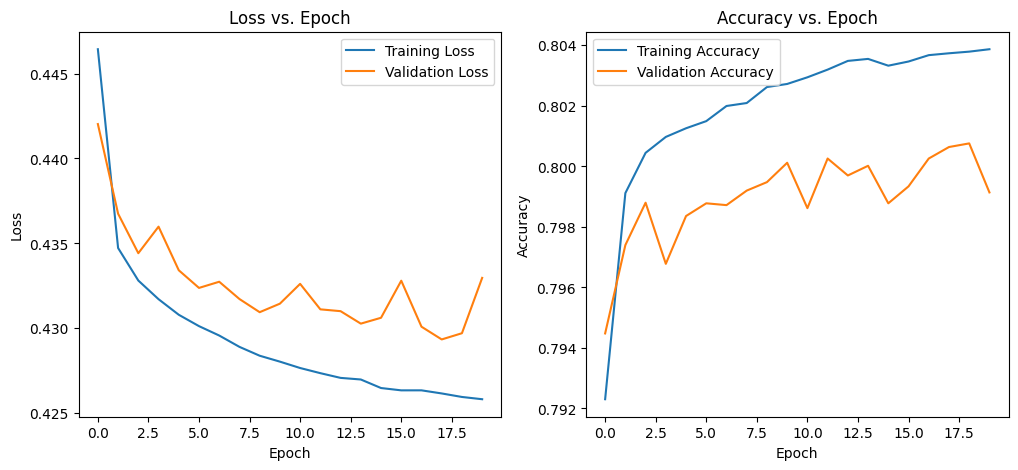

In [13]:
# --- Plot the Training History ---
def plot_history(history):
    """
    Plots the training and validation loss and accuracy.

    Args:
        history: A Keras History object (returned by model.fit()).
    """

    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epoch')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')

    plt.show()

plot_history(history)

In [14]:
# --- Evaluating on Test Data ---
loss, accuracy = model.evaluate(X_Test, y_Test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4330
Test Accuracy: 0.7991


In [15]:
#  Verify Data Preparation
print("Class distribution in training set:", np.unique(y_Train, return_counts=True))
print("Class distribution in test set:", np.unique(y_Test, return_counts=True))

Class distribution in training set: (array([0., 1.]), array([270755, 229245]))
Class distribution in test set: (array([0., 1.]), array([26993, 23007]))


In [16]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def improved_model():
    model = Sequential([
        Input(shape=(X_Train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
#  Train with Eearly stopping
improved_model = improved_model()
history = improved_model.fit(
    X_Train, y_Train,
    validation_data=(X_Test, y_Test),
    epochs=50,
    batch_size=128,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7590 - loss: 0.6211 - val_accuracy: 0.7931 - val_loss: 0.4731
Epoch 2/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7900 - loss: 0.4814 - val_accuracy: 0.7944 - val_loss: 0.4652
Epoch 3/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7894 - loss: 0.4770 - val_accuracy: 0.7930 - val_loss: 0.4668
Epoch 4/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7905 - loss: 0.4732 - val_accuracy: 0.7917 - val_loss: 0.4664
Epoch 5/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7903 - loss: 0.4718 - val_accuracy: 0.7942 - val_loss: 0.4626
Epoch 6/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7900 - loss: 0.4719 - val_accuracy: 0.7894 - val_loss: 0.4673
Epoch 7/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7919 - loss: 0.4687 - val_accuracy: 0.7967 - val_loss: 0.4559
Epoch 8/50
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7924 - loss: 0

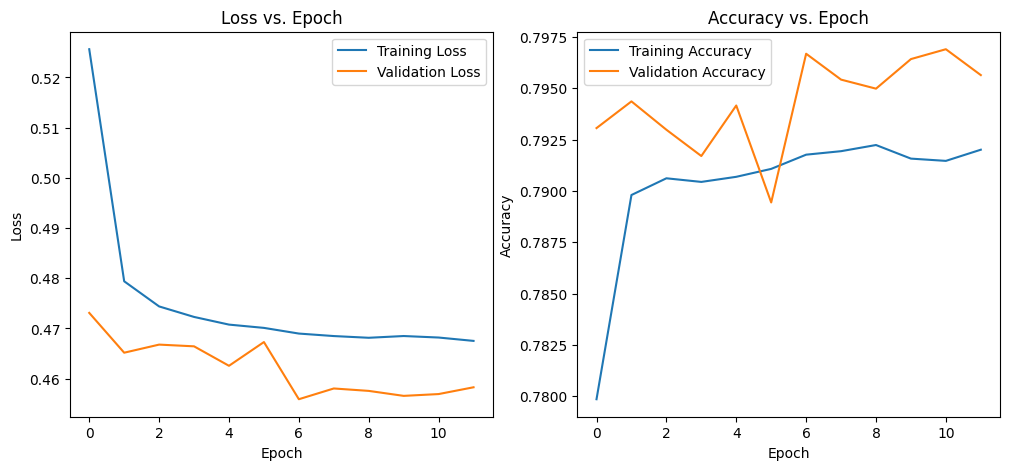

Improved Test Loss: 0.4559
Improved Test Accuracy: 0.7967


In [19]:
#  Re-evaluating
plot_history(history)
loss, accuracy = improved_model.evaluate(X_Test, y_Test, verbose=0)
print(f"Improved Test Loss: {loss:.4f}")
print(f"Improved Test Accuracy: {accuracy:.4f}")

## Exercise 2

Following the original paper (see lab 7), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

filename = "../Lab.7/SUSY-small.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", 
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", 
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)
print("Data loaded successfully!")

Data loaded successfully!


In [26]:
from sklearn.model_selection import train_test_split

# Define variable groups
raw_vars = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
feature_vars = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# Split data
X_raw = df[raw_vars]
X_features = df[feature_vars]
X_combined = df[raw_vars + feature_vars]
y = df["signal"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_train_features, X_test_features, _, _ = train_test_split(X_features, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

# Train models
model_raw = LogisticRegression(max_iter=1000).fit(X_train_raw, y_train)
model_features = LogisticRegression(max_iter=1000).fit(X_train_features, y_train)
model_combined = LogisticRegression(max_iter=1000).fit(X_train_combined, y_train)

# Get predicted probabilities
y_pred_raw = model_raw.predict_proba(X_test_raw)[:, 1]
y_pred_features = model_features.predict_proba(X_test_features)[:, 1]
y_pred_combined = model_combined.predict_proba(X_test_combined)[:, 1]

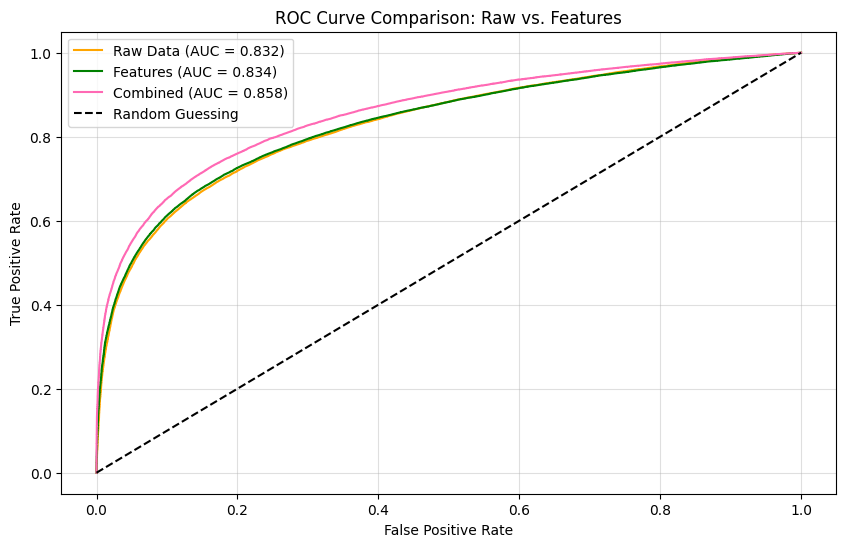

In [45]:
# Compute ROC curves
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_pred_raw)
fpr_features, tpr_features, _ = roc_curve(y_test, y_pred_features)
fpr_combined, tpr_combined, _ = roc_curve(y_test, y_pred_combined)

# Compute AUC
auc_raw = auc(fpr_raw, tpr_raw)
auc_features = auc(fpr_features, tpr_features)
auc_combined = auc(fpr_combined, tpr_combined)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Data (AUC = {auc_raw:.3f})', color='orange')
plt.plot(fpr_features, tpr_features, label=f'Features (AUC = {auc_features:.3f})', color='green')
plt.plot(fpr_combined, tpr_combined, label=f'Combined (AUC = {auc_combined:.3f})', color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Raw vs. Features')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tabulate import tabulate

# set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
def create_model1():
    model = Sequential([
        Dense(16, input_dim=X_Train.shape[1], activation='relu'),
        BatchNormalization(),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [20]:
def create_model2():
    model = Sequential([
        Dense(32, input_dim=X_Train.shape[1], activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.0005),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [22]:
def create_model3():
    input_layer = tf.keras.Input(shape=(X_Train.shape[1],))
    x = Dense(64, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    y = Dense(32, activation='relu')(x)
    y = BatchNormalization()(y)
    
    z = tf.keras.layers.concatenate([x, y])
    output = Dense(1, activation='sigmoid')(z)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0007),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [23]:
# Train Models
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

train_params = {
    'x': X_Train,
    'y': y_Train,
    'validation_data': (X_Test, y_Test),
    'epochs': 60,
    'batch_size': 128,
    'callbacks': [early_stop],
    'verbose': 1
}

print("Training Model 1...")
model1 = create_model1()
history1 = model1.fit(**train_params)

print("\nTraining Model 2...")
model2 = create_model2()
history2 = model2.fit(**train_params)

print("\nTraining Model 3...")
model3 = create_model3()
history3 = model3.fit(**train_params)

Training Model 1...
Epoch 1/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7745 - loss: 0.4766 - val_accuracy: 0.7947 - val_loss: 0.4409
Epoch 2/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7957 - loss: 0.4418 - val_accuracy: 0.7956 - val_loss: 0.4387
Epoch 3/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7973 - loss: 0.4388 - val_accuracy: 0.7960 - val_loss: 0.4369
Epoch 4/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7984 - loss: 0.4368 - val_accuracy: 0.7960 - val_loss: 0.4372
Epoch 5/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7993 - loss: 0.4355 - val_accuracy: 0.7956 - val_loss: 0.4368
Epoch 6/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7996 - loss: 0.4346 - val_accuracy: 0.7967 - val_loss: 0.4363
Epoch 7/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7999 - loss: 0.4340 - val_accuracy: 0.7971 - val_loss: 0.4360
Epoch 8/60
3907/3907 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 

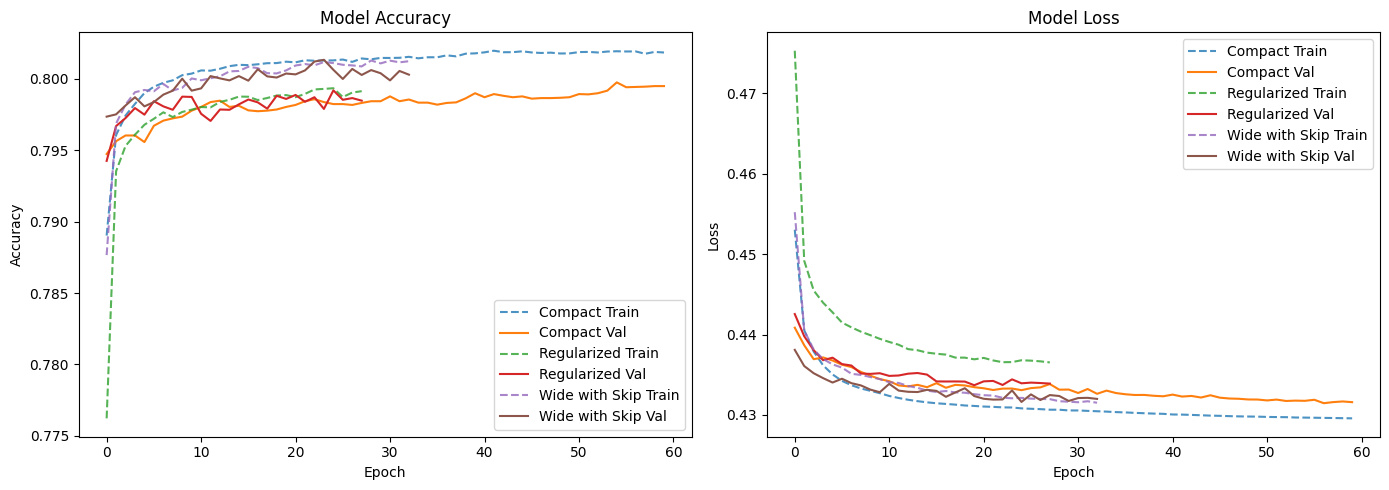

In [24]:
#  Evaluate Performance
def plot_history(histories, labels):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], '--', alpha=0.8, label=f'{labels[i]} Train')
        plt.plot(history.history['val_accuracy'], '-', label=f'{labels[i]} Val')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], '--', alpha=0.8, label=f'{labels[i]} Train')
        plt.plot(history.history['val_loss'], '-', label=f'{labels[i]} Val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_history([history1, history2, history3], ['Compact', 'Regularized', 'Wide with Skip'])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


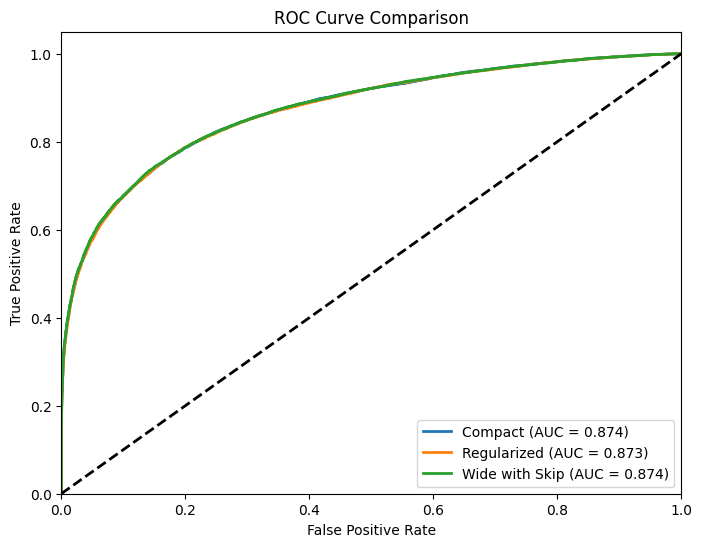

In [25]:
def plot_roc(models, labels):
    plt.figure(figsize=(8, 6))
    for i, model in enumerate(models):
        y_pred = model.predict(X_Test).ravel()
        fpr, tpr, _ = roc_curve(y_Test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{labels[i]} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()

plot_roc([model1, model2, model3], ['Compact', 'Regularized', 'Wide with Skip'])

In [26]:
# metrics table
results = []
for i, model in enumerate([model1, model2, model3]):
    loss, acc = model.evaluate(X_Test, y_Test, verbose=0)
    results.append([
        f"Model {i+1}",
        f"{acc*100:.2f}%",
        f"{loss:.4f}",
        len(model.layers)
    ])

print(tabulate(results, 
               headers=['Model', 'Test Accuracy', 'Loss', 'Layers'],
               tablefmt='grid'))

+---------+-----------------+--------+----------+
| Model   | Test Accuracy   |   Loss |   Layers |
+=========+=================+========+==========+
| Model 1 | 79.94%          | 0.4315 |        4 |
+---------+-----------------+--------+----------+
| Model 2 | 79.86%          | 0.4337 |        6 |
+---------+-----------------+--------+----------+
| Model 3 | 80.06%          | 0.4316 |        8 |
+---------+-----------------+--------+----------+


## Exercise 4

Repeat exercise 4 from Lab 8, adding your best performing DNN as one of the models.  


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define train - new DNN model
def create_and_train_dnn(X_train, y_train):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=1024,
        callbacks=[early_stop],
        verbose=1
    )
    
    return model

# Create and train the DNN
dnn_model = create_and_train_dnn(X_train, y_train)

/home/cterrones/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7220 - loss: 0.5415 - val_accuracy: 0.7984 - val_loss: 0.4446
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7943 - loss: 0.4456 - val_accuracy: 0.7982 - val_loss: 0.4387
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7975 - loss: 0.4398 - val_accuracy: 0.7991 - val_loss: 0.4366
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7989 - loss: 0.4376 - val_accuracy: 0.8000 - val_loss: 0.4345
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7992 - loss: 0.4360 - val_accuracy: 0.7986 - val_loss: 0.4362
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7997 - loss: 0.4345 - val_accuracy: 0.8003 - val_loss: 0.4333
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8000 - loss: 0.4342 - val_accuracy: 0.8005 - val_loss: 0.4325
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8006 - loss: 0.4333 - val_accuracy: 0

In [36]:
print("X_train shape:", X_train.shape)
print("y_train values:", np.unique(y_train, return_counts=True))

X_train shape: (400000, 18)
y_train values: (array([0., 1.]), array([216492, 183508]))


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# load/prepare data
filename = "../Lab.7/SUSY-small.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", 
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", 
            "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, names=VarNames)
X = df[VarNames[1:]]
y = df["signal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# define and train DNN model.
def create_and_train_dnn(X_train, y_train):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=1024,
        callbacks=[early_stop],
        verbose=1
    )  
    return model
    
dnn_model = create_and_train_dnn(X_train, y_train)

/home/cterrones/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7260 - loss: 0.5284 - val_accuracy: 0.7990 - val_loss: 0.4463
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7946 - loss: 0.4454 - val_accuracy: 0.8010 - val_loss: 0.4356
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7977 - loss: 0.4394 - val_accuracy: 0.8015 - val_loss: 0.4339
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7992 - loss: 0.4366 - val_accuracy: 0.8016 - val_loss: 0.4329
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8001 - loss: 0.4351 - val_accuracy: 0.8020 - val_loss: 0.4321
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8013 - loss: 0.4337 - val_accuracy: 0.8024 - val_loss: 0.4324
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8010 - loss: 0.4330 - val_accuracy: 0.8026 - val_loss: 0.4317
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8003 - loss: 0.4328 - val_accuracy: 0

In [42]:
# ROC comparison function
def compare_classifiers(X_train, y_train, X_test, y_test, dnn_model):
    classifiers = [
        LogisticRegression(max_iter=1000),
        RandomForestClassifier(n_estimators=50),
        GradientBoostingClassifier(n_estimators=50),
        dnn_model
    ]
    
    names = ["Logistic Regression", "Random Forest", "Gradient Boosting", "DNN"]
    
    plt.figure(figsize=(10, 8))
    for clf, name in zip(classifiers, names):
        if name == "DNN":
            y_score = clf.predict(X_test).ravel()
        else:
            clf.fit(X_train, y_train)
            y_score = clf.predict_proba(X_test)[:,1]
        
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC={roc_auc:.3f})')
 
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classifier Comparison (Including DNN)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()      

In [44]:
# significance calculation Function
def compute_max_significance(X_test, y_test, models, model_names, scenarios):
    results = {}
    
    for model, name in zip(models, model_names):
        if name == "DNN":
            y_score = model.predict(X_test).ravel()
        else:
            y_score = model.predict_proba(X_test)[:,1]
            
        sorted_idx = np.argsort(y_score)[::-1]
        y_score_sorted = y_score[sorted_idx]
        y_true_sorted = y_test.values[sorted_idx]
        
        tp = np.cumsum(y_true_sorted)
        fp = np.cumsum(1 - y_true_sorted)
        
        scenario_results = {}
        for N_S, N_B in scenarios:
            S_prime = (tp / len(y_test)) * N_S
            B_prime = (fp / len(y_test)) * N_B
            sigma_S = S_prime / np.sqrt(S_prime + B_prime + 1e-10)

          
            max_idx = np.argmax(sigma_S)
            scenario_results[(N_S, N_B)] = {
                'max_sigma': sigma_S[max_idx],
                'threshold': y_score_sorted[max_idx],
                'efficiency_S': tp[max_idx] / sum(y_test == 1),
                'efficiency_B': fp[max_idx] / sum(y_test == 0)
            }
        
        results[name] = scenario_results
    
    return results            

In [45]:
# Initialize models for significance calculation
models = [
    GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train),
    dnn_model
]
model_names = ["GradientBoosting", "DNN"]

scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

--- ROC Curve Comparison ---
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step


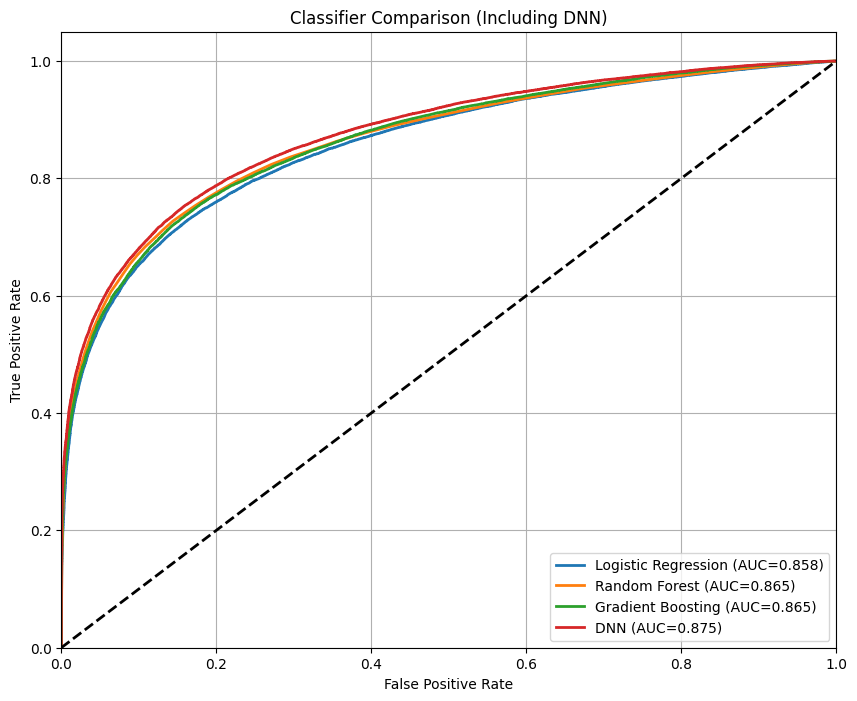

In [47]:
print("--- ROC Curve Comparison ---")
compare_classifiers(X_train, y_train, X_test, y_test, dnn_model)

In [50]:
print("--- Significance Calculation --- ")
significance_results = compute_max_significance(X_test, y_test, models, model_names, scenarios)

--- Significance Calculation --- 
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 865us/step


In [51]:
# results
print("\n{:<15} {:<15} {:<10} {:<15} {:<15} {:<15}".format(
    "Scenario (S,B)", "Model", "σS_max", "Threshold", "ϵ_Signal", "ϵ_Background"))
for scenario in scenarios:
    for model in model_names:
        res = significance_results[model][scenario]
        print(f"({scenario[0]:5},{scenario[1]:6})  {model:15}  {res['max_sigma']:10.3f}  "
              f"{res['threshold']:15.3f}  {res['efficiency_S']:15.3f}  {res['efficiency_B']:15.3f}")


Scenario (S,B)  Model           σS_max     Threshold       ϵ_Signal        ϵ_Background   
(   10,   100)  GradientBoosting       1.148            0.805            0.432            0.018
(   10,   100)  DNN                   1.204            0.819            0.455            0.017
(  100,  1000)  GradientBoosting       3.631            0.805            0.432            0.018
(  100,  1000)  DNN                   3.806            0.819            0.455            0.017
( 1000, 10000)  GradientBoosting      11.483            0.805            0.432            0.018
( 1000, 10000)  DNN                  12.036            0.819            0.455            0.017
(10000,100000)  GradientBoosting      36.311            0.805            0.432            0.018
(10000,100000)  DNN                  38.062            0.819            0.455            0.017
